In [1]:
# 매 강의 시작시마다 동일하게 처리해야 함
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:13pt;
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:10pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:10pt;padding:5px;}
table.dataframe{font-size:15px;
</style>
"""))

<b><font size="5" color="red">ch12. 데이터 시각화</font></b>
- 시각화 라이브러리 : matplotlib, seaborn(데이터시각화), folium(지도시각화)
- matplotlib : 파이썬에서 가장 쉽게 많이 사용하는 시각화 라이브러리. 판다스 내부에 포함
- seaborn : matplotlib기반으로 다양한 색, 테마, 챠트 기능과 groupby 기능 포함된 라이브러리

## 1절 matplotlib
- https://pypi.org/project/matplotlib
- https://matplotlib.org/stable/api/index

In [ ]:
import matplotlib
matplotlib.__version__


### 1.1 패키지 import 및 기본 설정

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina' 
# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
# plt.rc('font', family='Apple Gothic') # Mac
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지
# warning(경고) 안보이게

### 1.2 그래프 그리기
- matplotlib으로 그래프 그리기 위한 단계
    1. 데이터 준비
    2.그래프 생성
    3. 그래프 함수로 그리기
    4. 그래프 커스터마이징
    5. 그래프 출력 및 저장

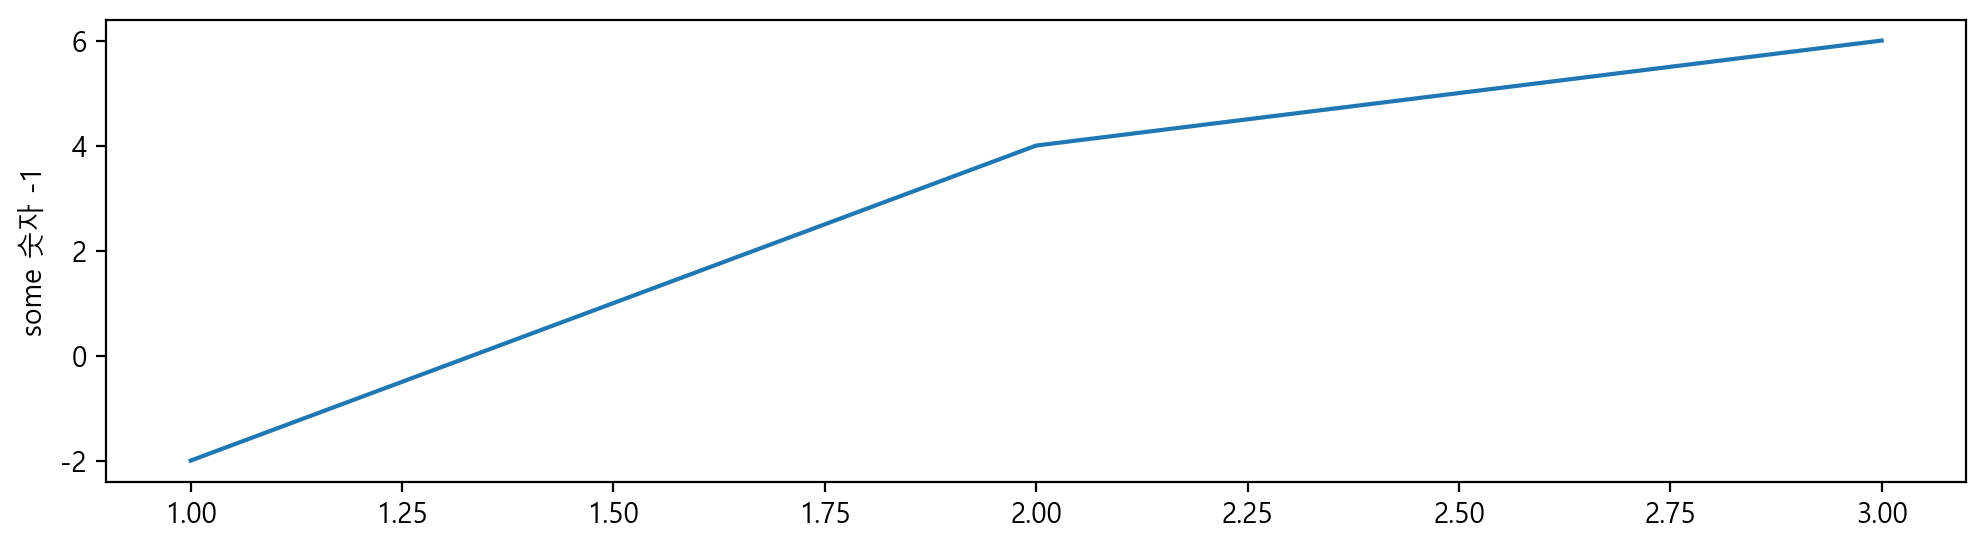

In [34]:
x = [1, 2, 3] # 1)데이터 준비
y = [-2, 4, 6]
plt.figure(figsize=(12, 3)) # 2) 그래프 객체 생성
plt.plot(x, y) # 3)그래프 함수
plt.ylabel('some 숫자 -1') # 4)커스터마이징
plt.show() # 5)그래프 화면 출력 cf)plt.savefig('파일명.jpg')

### 1.3 그래프 영역 나누기

In [9]:
import numpy as np
x = np.arange(0, 10, 0.01)
len(x)

1000

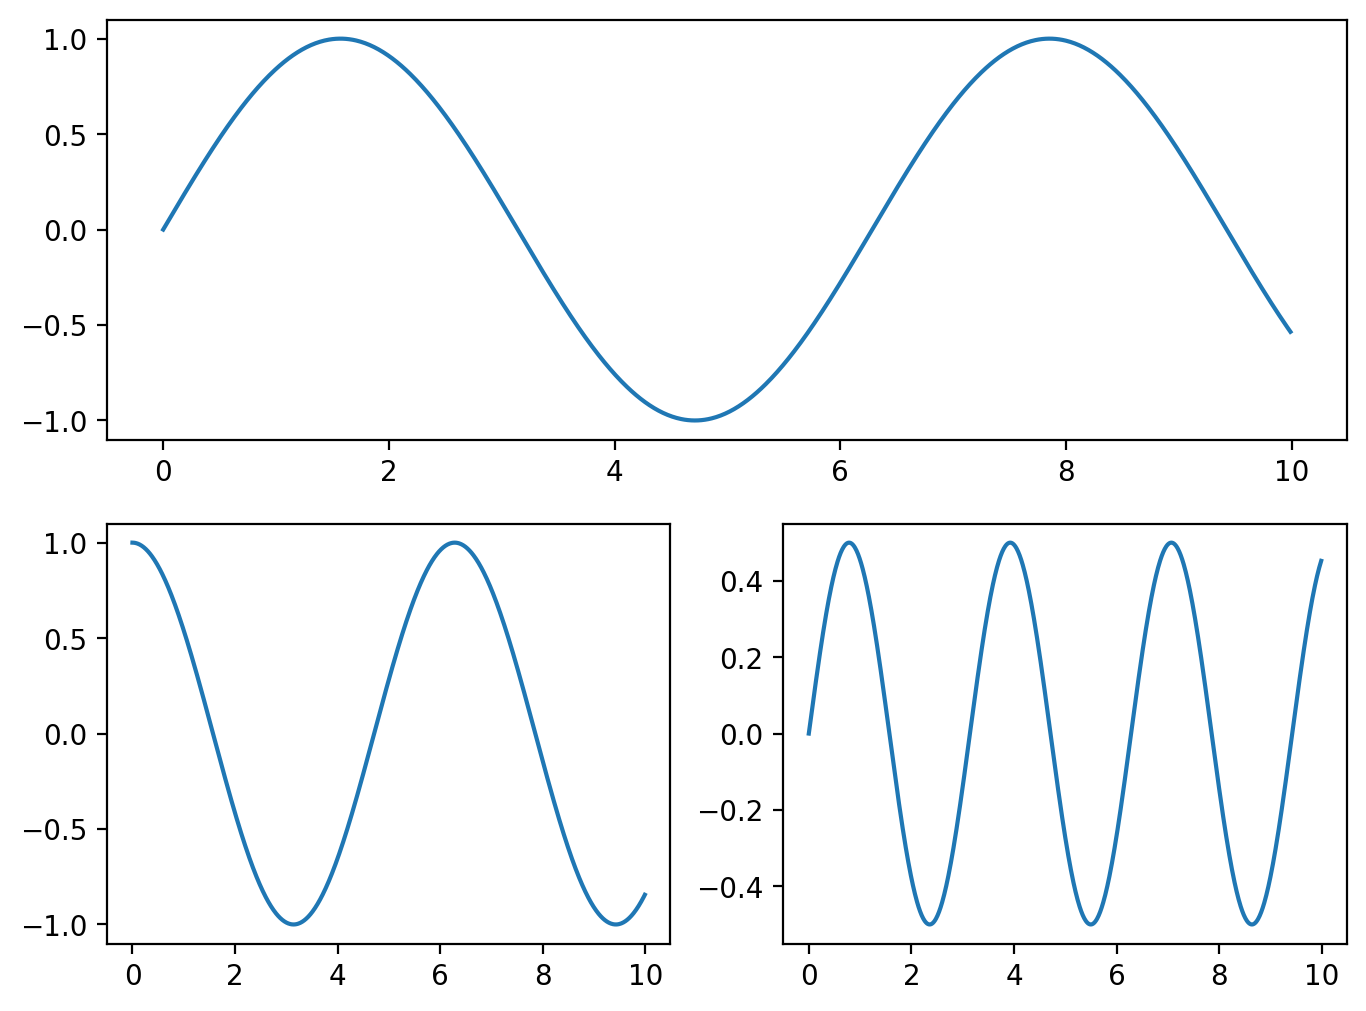

In [10]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(224);     plt.plot(x, np.sin(x)*np.cos(x))


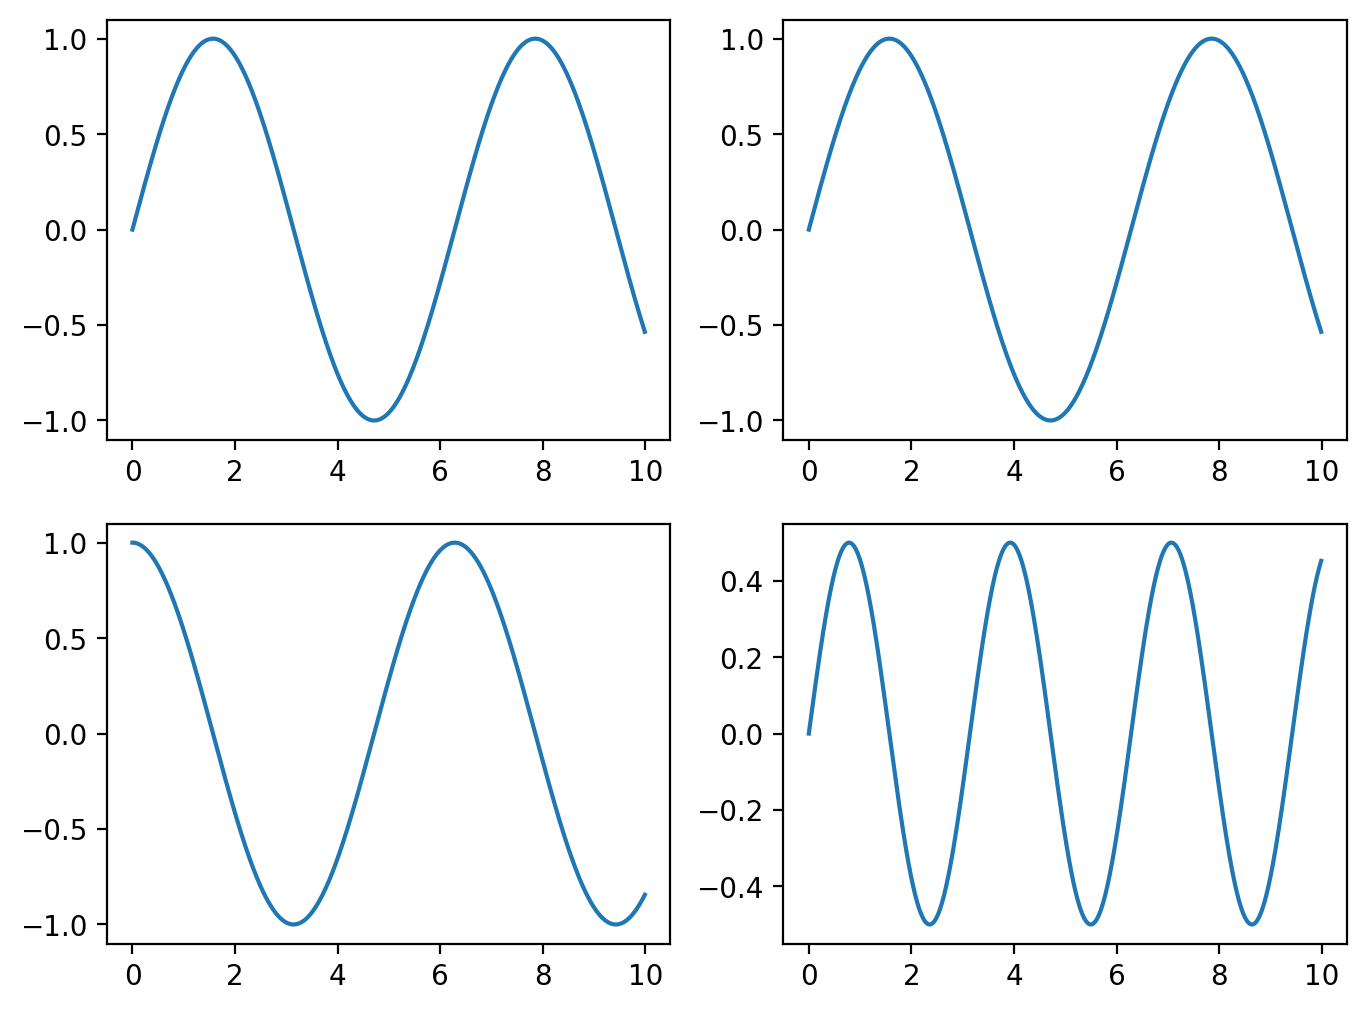

In [11]:
plt.figure(figsize=(8, 6))
plt.subplot(2, 2, 1); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 2); plt.plot(x, np.sin(x))
plt.subplot(2, 2, 3); plt.plot(x, np.cos(x))
plt.subplot(2, 2, 4); plt.plot(x, np.sin(x)*np.cos(x))

### 2) subplots()함수로 서브플롯 추가
- 교안(14page) : https://wikidocs.net/92085

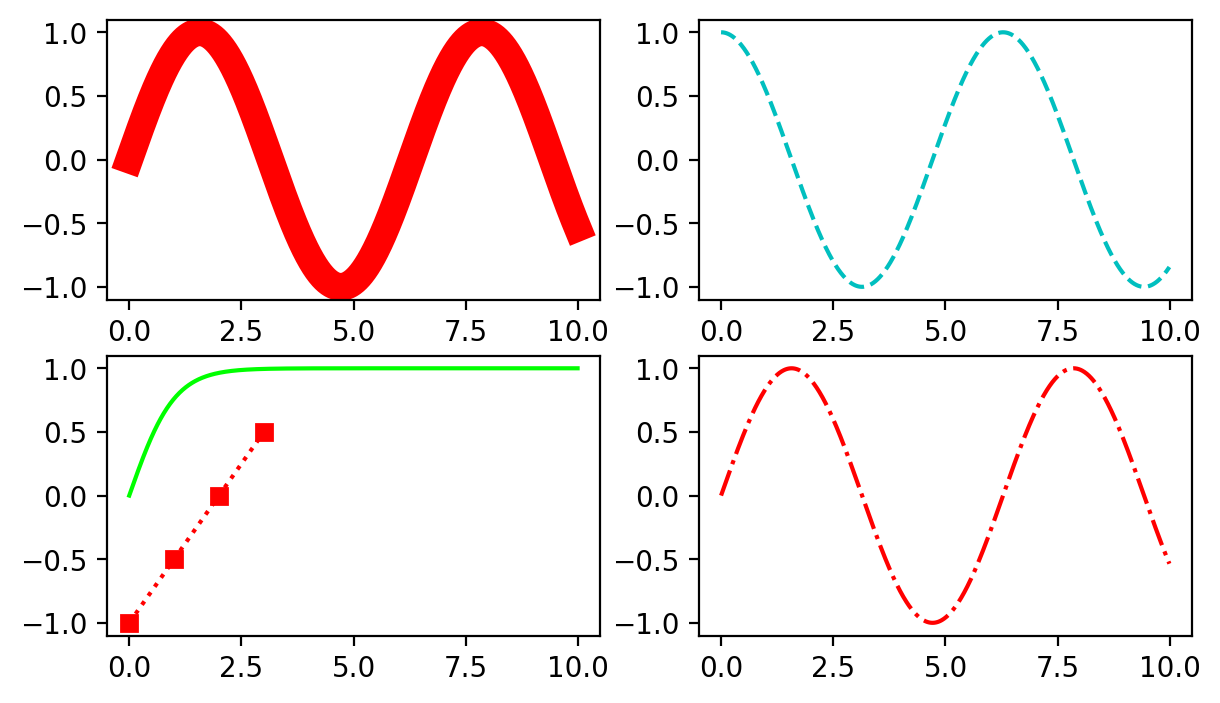

In [12]:
# 2행2열 서브플롯
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(7, 4))
axes[0,0].plot(x, np.sin(x), 'r', linewidth=10)
axes[0,1].plot(x, np.cos(x), 'c--')#color='c', linestyle=':','--','-'
axes[1,0].plot([0,1,2,3],[-1,-0.5, 0, 0.5], 'rs:')# color='r', marker='s''o''^'
axes[1,0].plot(x, np.tanh(x), '#00FF00')
axes[1,1].plot(x, np.sin(x), 'r-.')
plt.show()


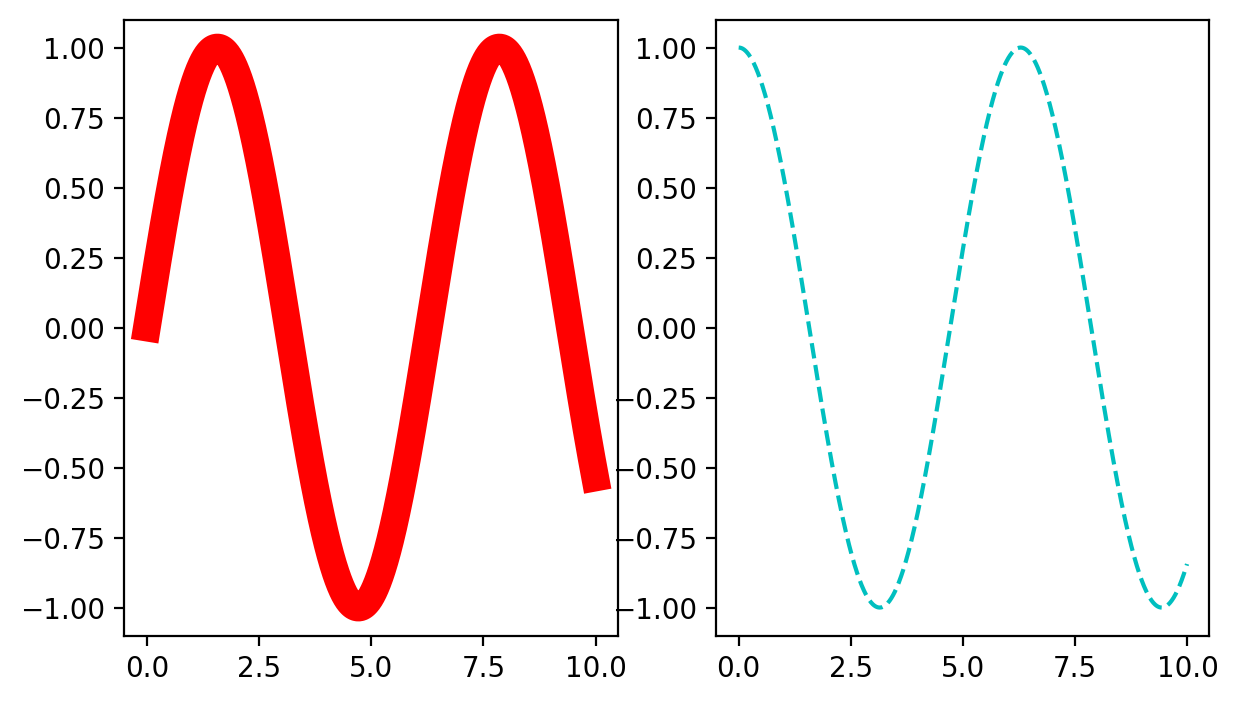

In [13]:
# 2행2열 서브플롯
fig, axes = plt.subplots(ncols=2, figsize=(7, 4))
axes[0].plot(x, np.sin(x), 'r', linewidth=10)
axes[1].plot(x, np.cos(x), 'c--')#color='c', linestyle=':','--','-'

### 3) pandas.DataFrame.plot()
- plt.plot(x, y, fmt)
- df.plot(x=열이름, y=열이름, kind='line' figsize, title, xlim, ylim...)
    - kind : line(기본값), scatter(점도표), bar, barh, box, pie, density,...
    - xlim, ylim : list/tuple

In [14]:
from seaborn import load_dataset
iris = load_dataset('iris')
iris.sample()


,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


### 범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot (교안20page)

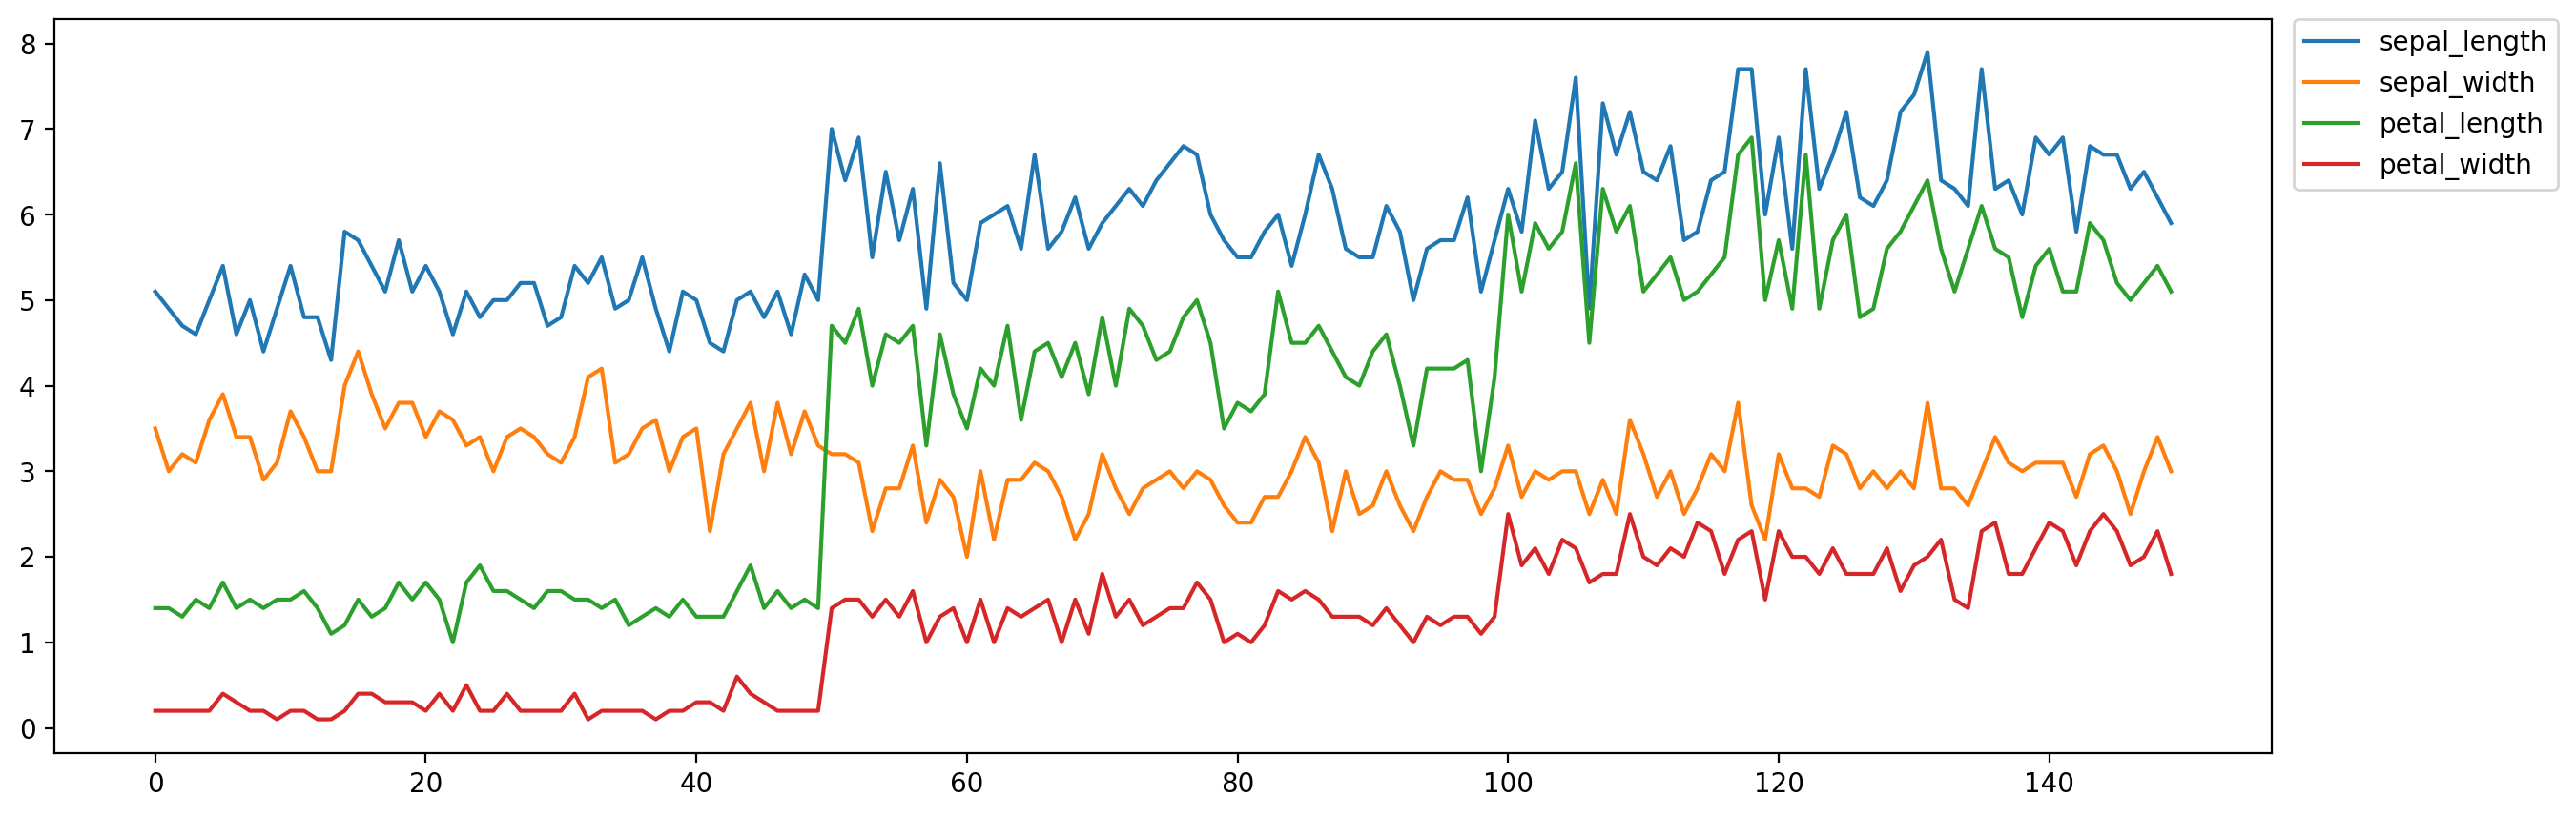

In [15]:
iris.plot(kind='line', figsize=(15,5))
# g.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)
#sns.move_legend(g, "upper left", bbox_to_anchor=(1, 1))
# plt.savefig('data/ch12_iris.jpg')
plt.show()


In [16]:
iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


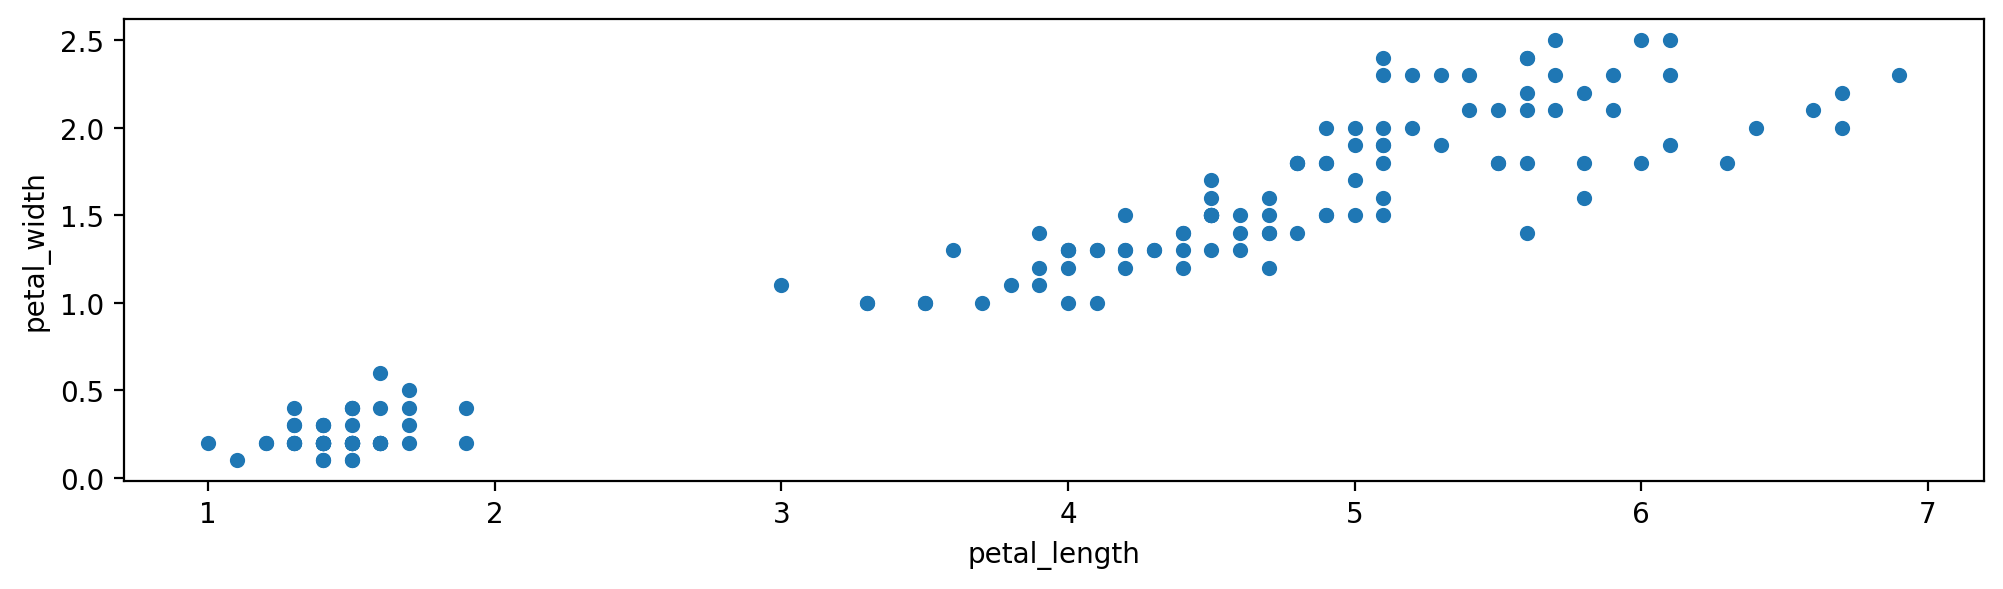

In [17]:
iris.plot(x='petal_length', y='petal_width', kind='scatter', figsize=(12,3))
plt.show()

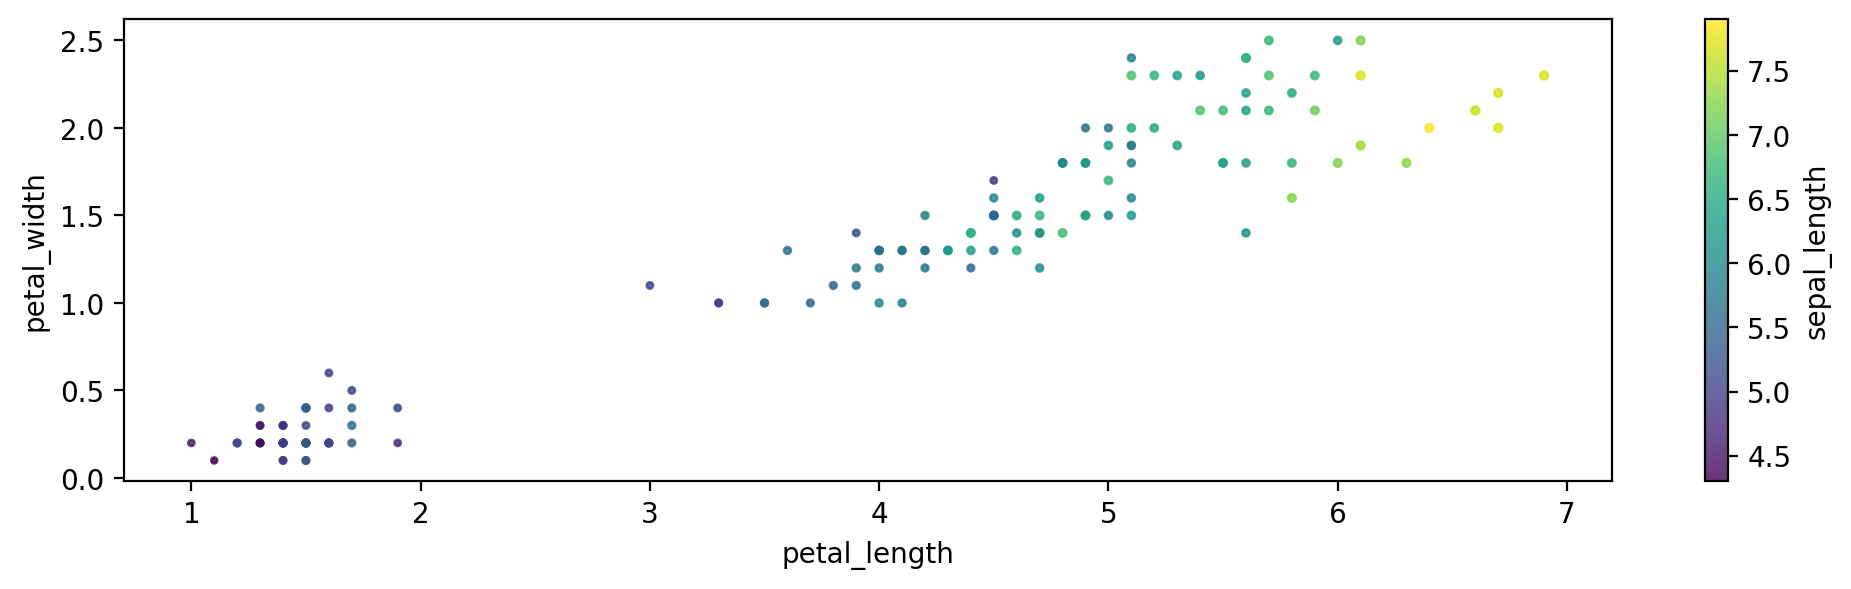

In [18]:
iris.plot(kind='scatter',
         x='petal_length',
         y='petal_width',
         figsize=(12,3),
         s='sepal_length', #size
         c='sepal_length', # color
         alpha=.8) # 0<=투명도<=1 
plt.show()

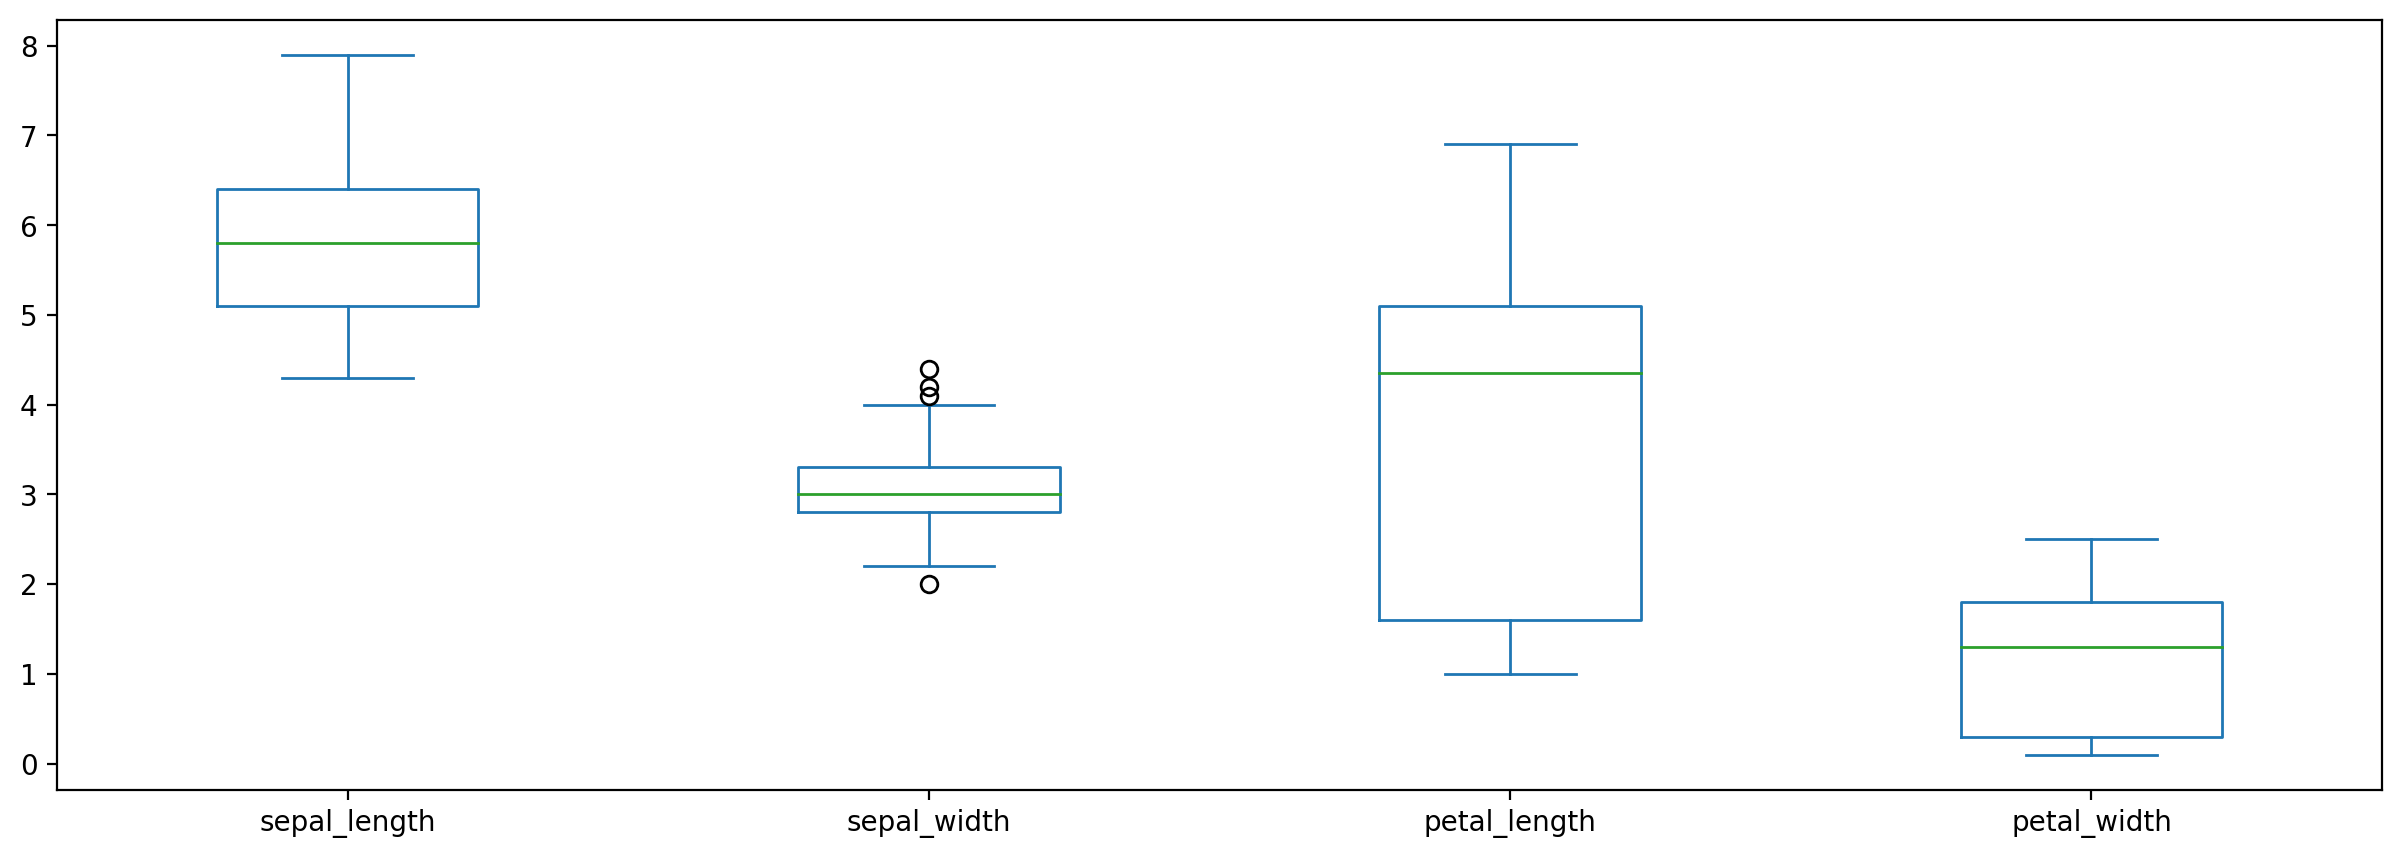

In [19]:
# 모든 열의 boxplot(이상치 여부, q1, q2, q3, min, max)
iris.plot(kind='box', figsize=(15,5))
plt.show()

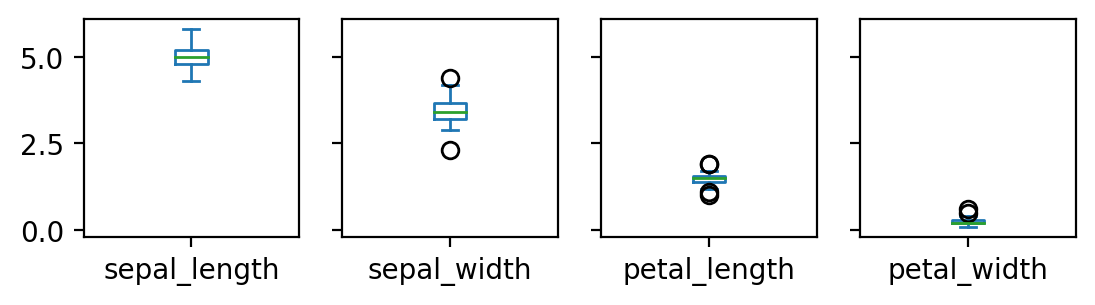

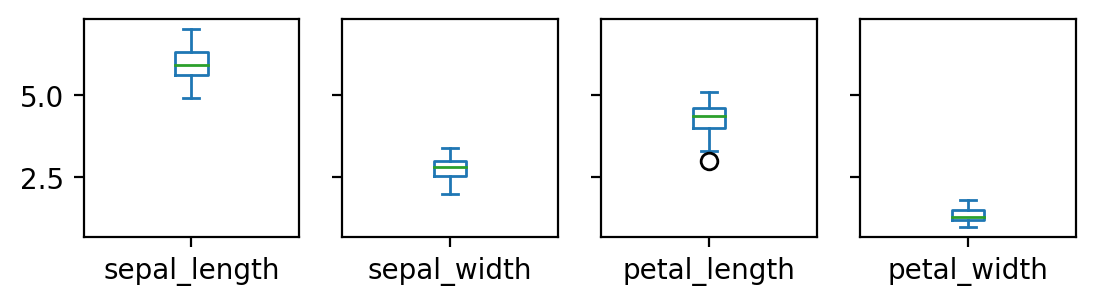

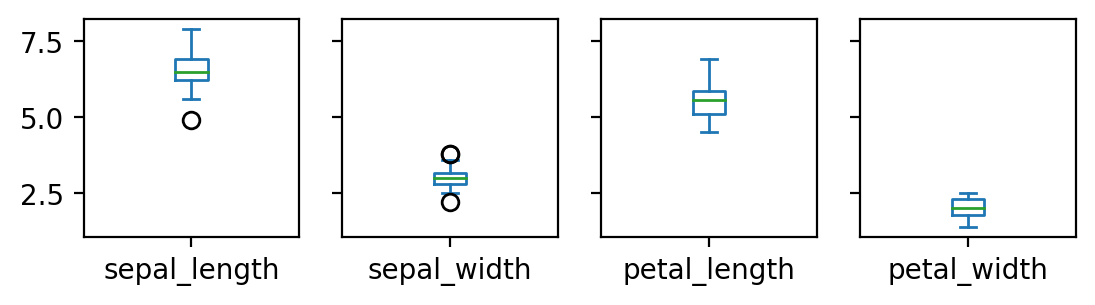

In [20]:
# 종별 boxplot
iris.groupby('species').plot(kind='box',
                            subplots=True,
                            layout=(3,4),
                            sharey=True, # 축공유
                            )
plt.show()

## 1.4 다양한 그래프 그리기
- pyplot함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

### 1) plt.scatter() : 산점도

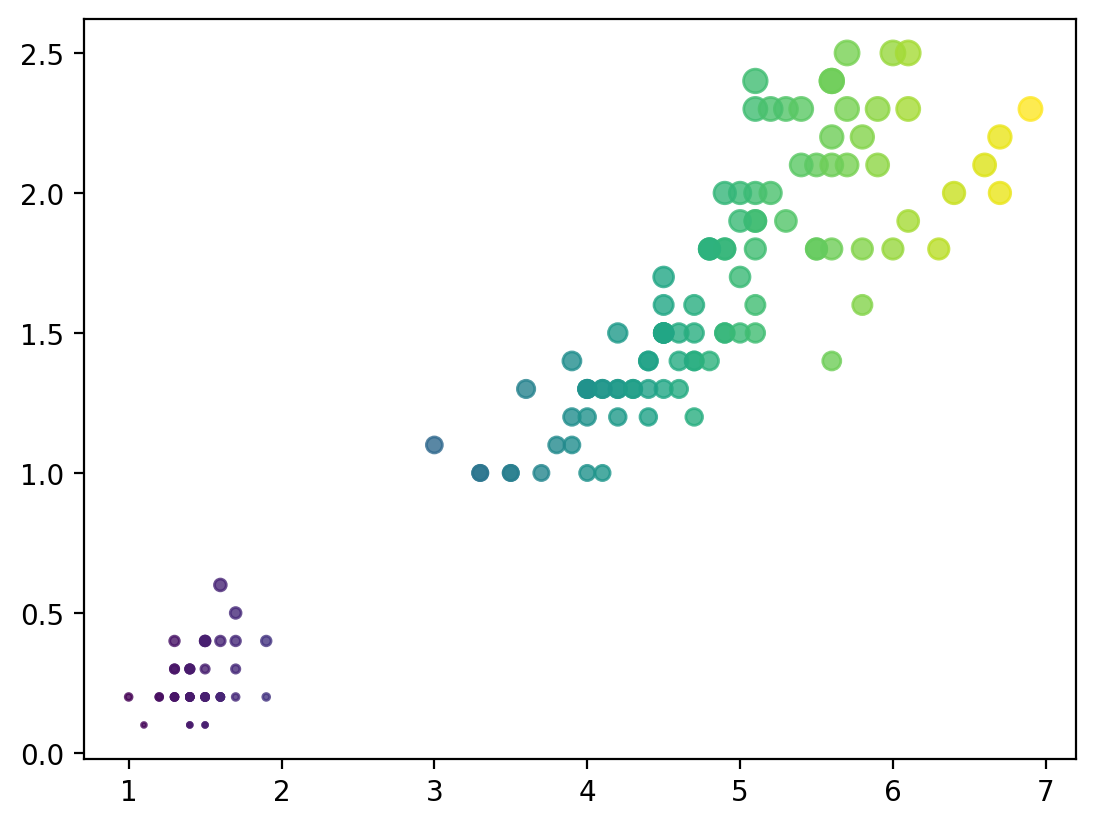

In [21]:
plt.scatter(iris.petal_length, iris.petal_width,
           s=iris.petal_width*30,  # size
           c=iris.petal_length*20, # color
           alpha=.8)


### 2)boxplot(단점:분포를 몰라), violinplot()

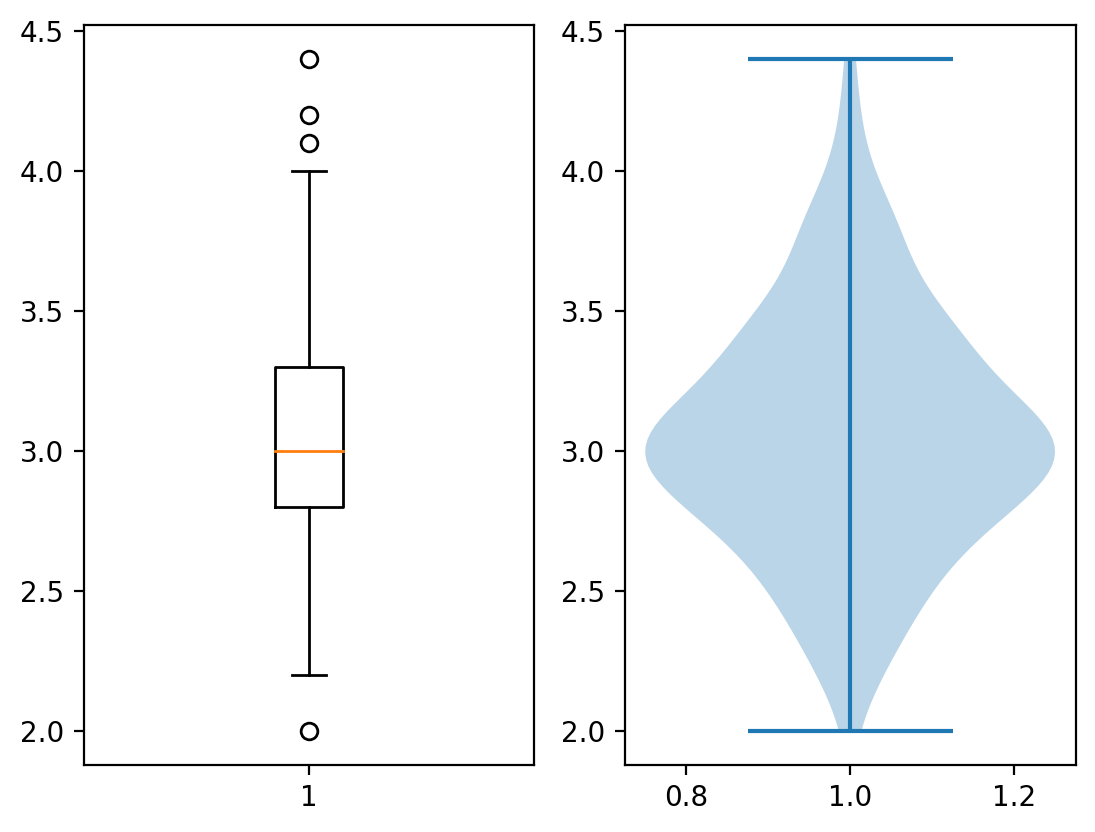

In [22]:
fig, axes = plt.subplots(ncols=2)
axes[0].boxplot(iris.sepal_width)
axes[1].violinplot(iris.sepal_width)
plt.show()

### 3)bar(), barh(), axvline(수직선), axhline(수평선)

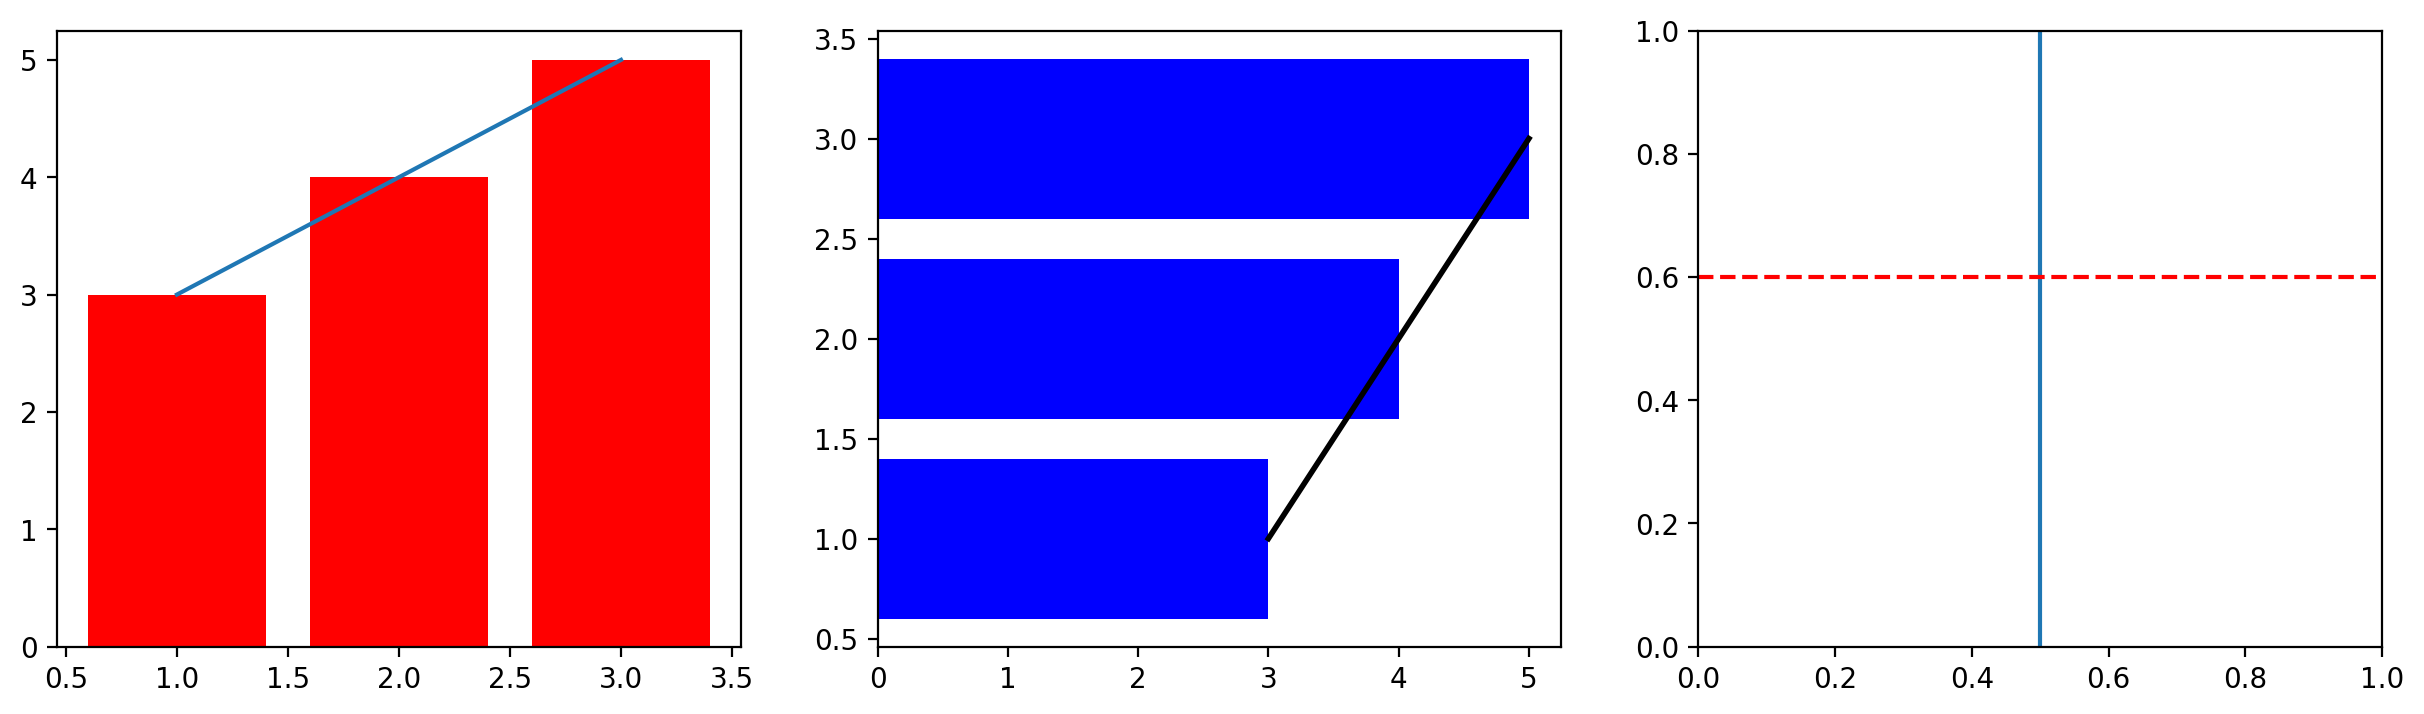

In [23]:
x=[1, 2, 3]
y=[3, 4, 5]
fig, axes = plt.subplots(ncols=3, figsize=(15,4))
axes[0].bar(x, y, color='r')
axes[0].plot(x, y)
axes[1].barh(x, y, color='b')
axes[1].plot(y,x, 'k', linewidth=2) # k:black
axes[2].axvline(0.5)
axes[2].axhline(0.6, c='r', linestyle='--')

### 4)hist(도수분포표;histogram)

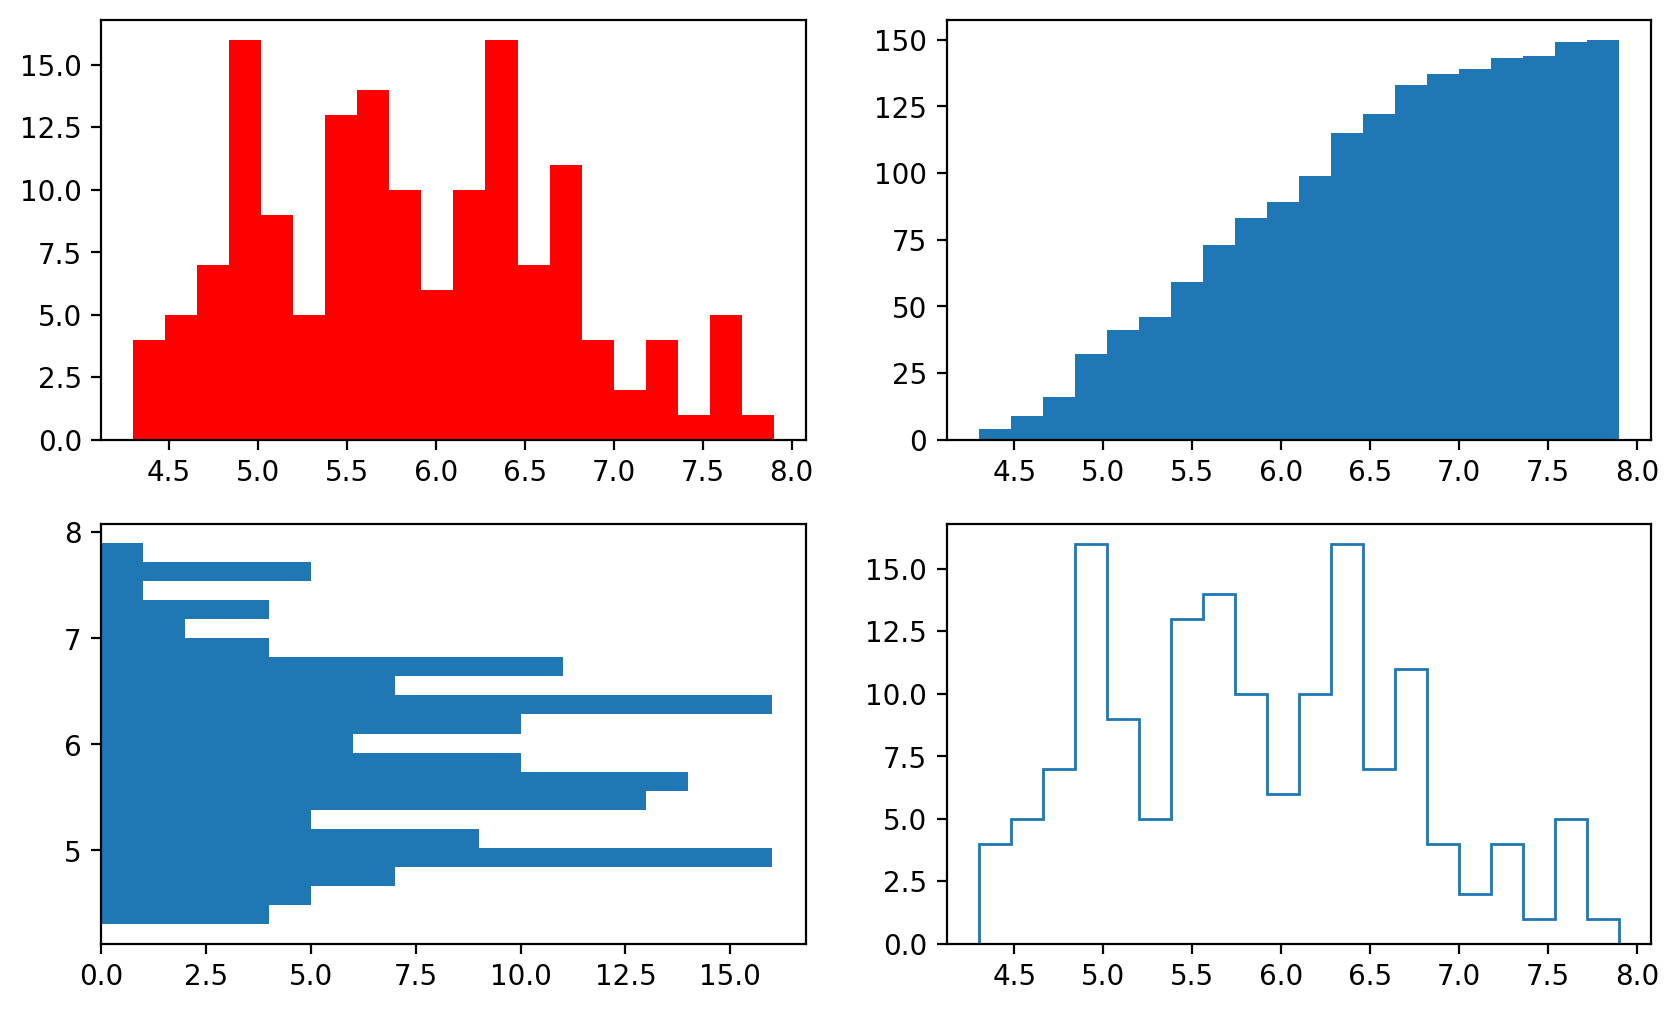

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
axes[0,0].hist(iris.sepal_length, bins=20, color='r') # 히스토그램(도수분포표)
axes[0,1].hist(iris.sepal_length, bins=20, cumulative=True) #누적히스토그램
axes[1,0].hist(iris.sepal_length, bins=20, orientation='horizontal') # 수평히스토그램
axes[1,1].hist(iris.sepal_length, bins=20, histtype='step') 
plt.show()


## 1.5 그래프 커스터마이징
### 1) linestyle, linewidth, color, marker... (plot의 매개변수로 지정)
### 2) text(), annotate()
[참고사이트](https://matplotlib.org/api/axes_api.html#text-and-annotations)

In [52]:
# 개별 폰트 설정을 위한 방법
from matplotlib.font_manager import FontProperties
font_path = 'C:/ai_x/source/01_python/font/BlackHanSans-Regular.ttf' # 폰트파일(네이버폰트, 구글폰트 등에서 다운로드)
# font_path = 'C:\Windows\Fonts\HMFMPYUN.TTF' # 기본 내장 폰트 사용시
font_prop = FontProperties(fname=font_path, size=25)


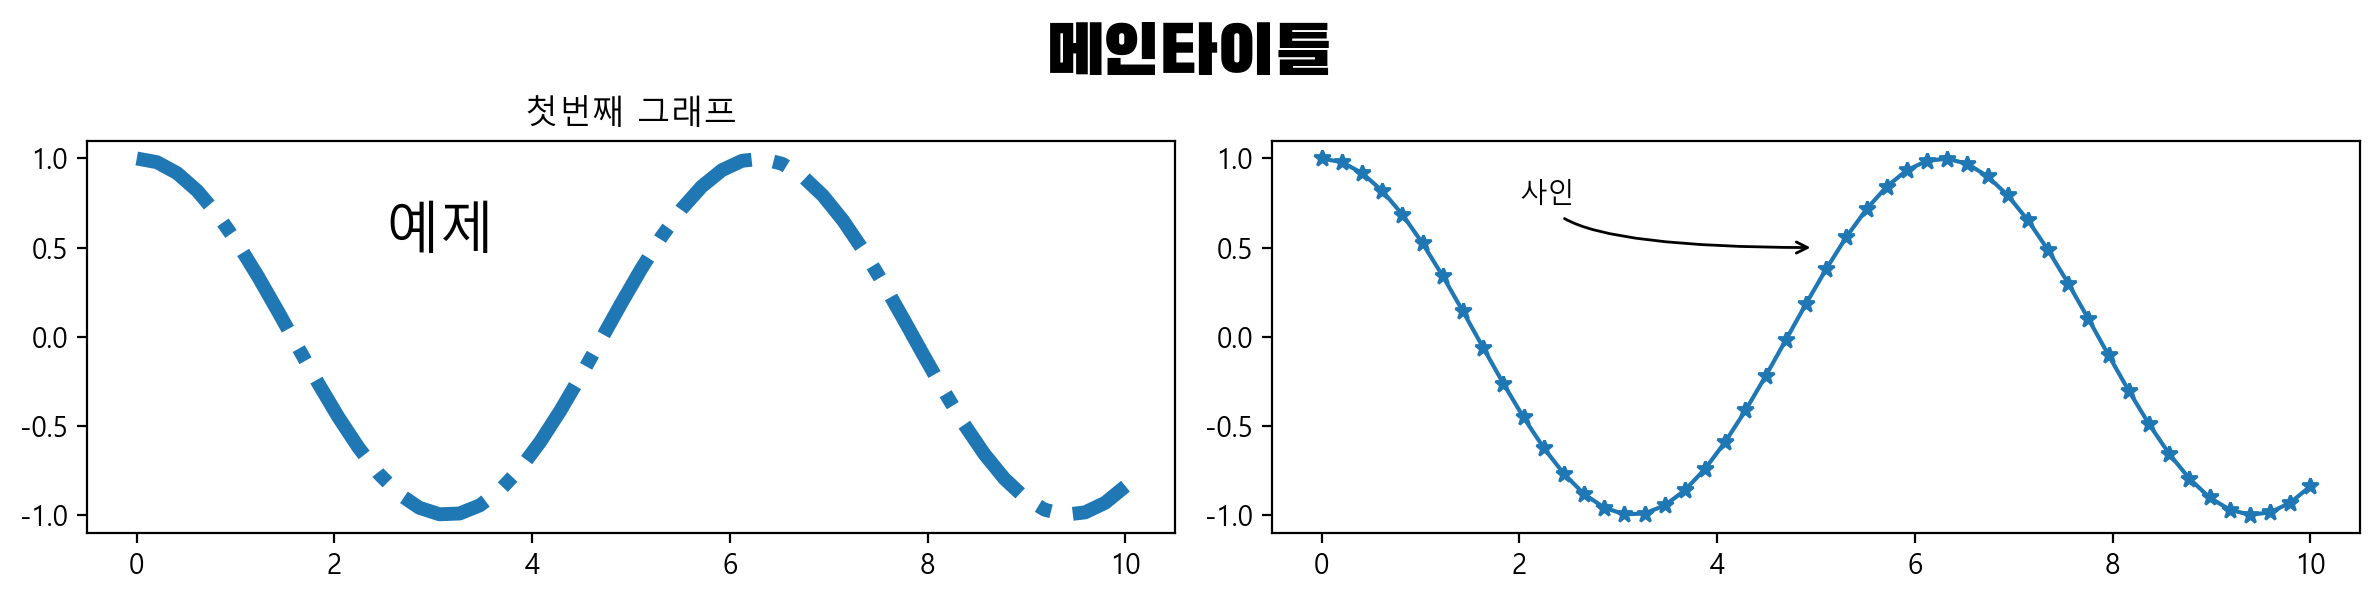

In [69]:
import numpy as np
x = np.linspace(0, 10) # num=50
y = np.cos(x)
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(x, y, linewidth=5, linestyle='-.')
axes[0].text(2.5, 0.5, '예제', fontsize=20)
axes[0].set_title('첫번째 그래프')
axes[1].plot(x, y, marker='*')
axes[1].annotate('사인', xytext=(2, 0.75), #글자가 있을 좌표 위치(좌하))
             xy=(5, 0.5), # 화살표가 가리킬 촤표 위치
             arrowprops=dict(arrowstyle='->',
                            connectionstyle='angle3') # angle(꺽은선), arc(직선), ....
            )

plt.tight_layout(rect=[0,0,1,0.9]) # left(0), bottom(0), right(1), top(0.9) : 경계의 상대적 비율
plt.suptitle('메인타이틀', fontproperties=font_prop)
plt.show()

### 3) 수학기호
- https://matplotlib.org/users/mathtext.html(교안 30p)

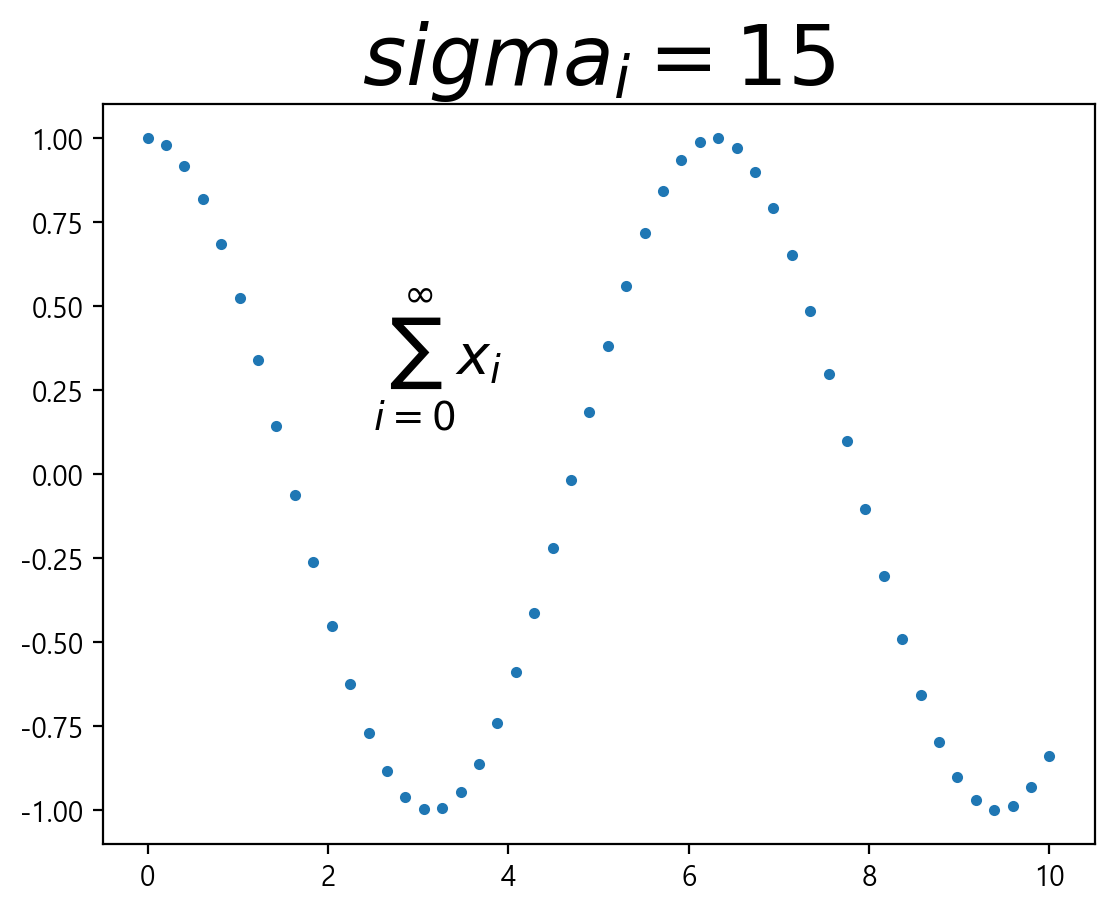

In [78]:
plt.scatter(x, y, marker='.')
plt.title(r'$sigma_i = 15$', fontsize=30)
plt.text(2.5, 0.3, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.show()

### 4) 축과 눈금
- https://matplotlib.org/3.1.0/api/axis_api.html (교안 33p)

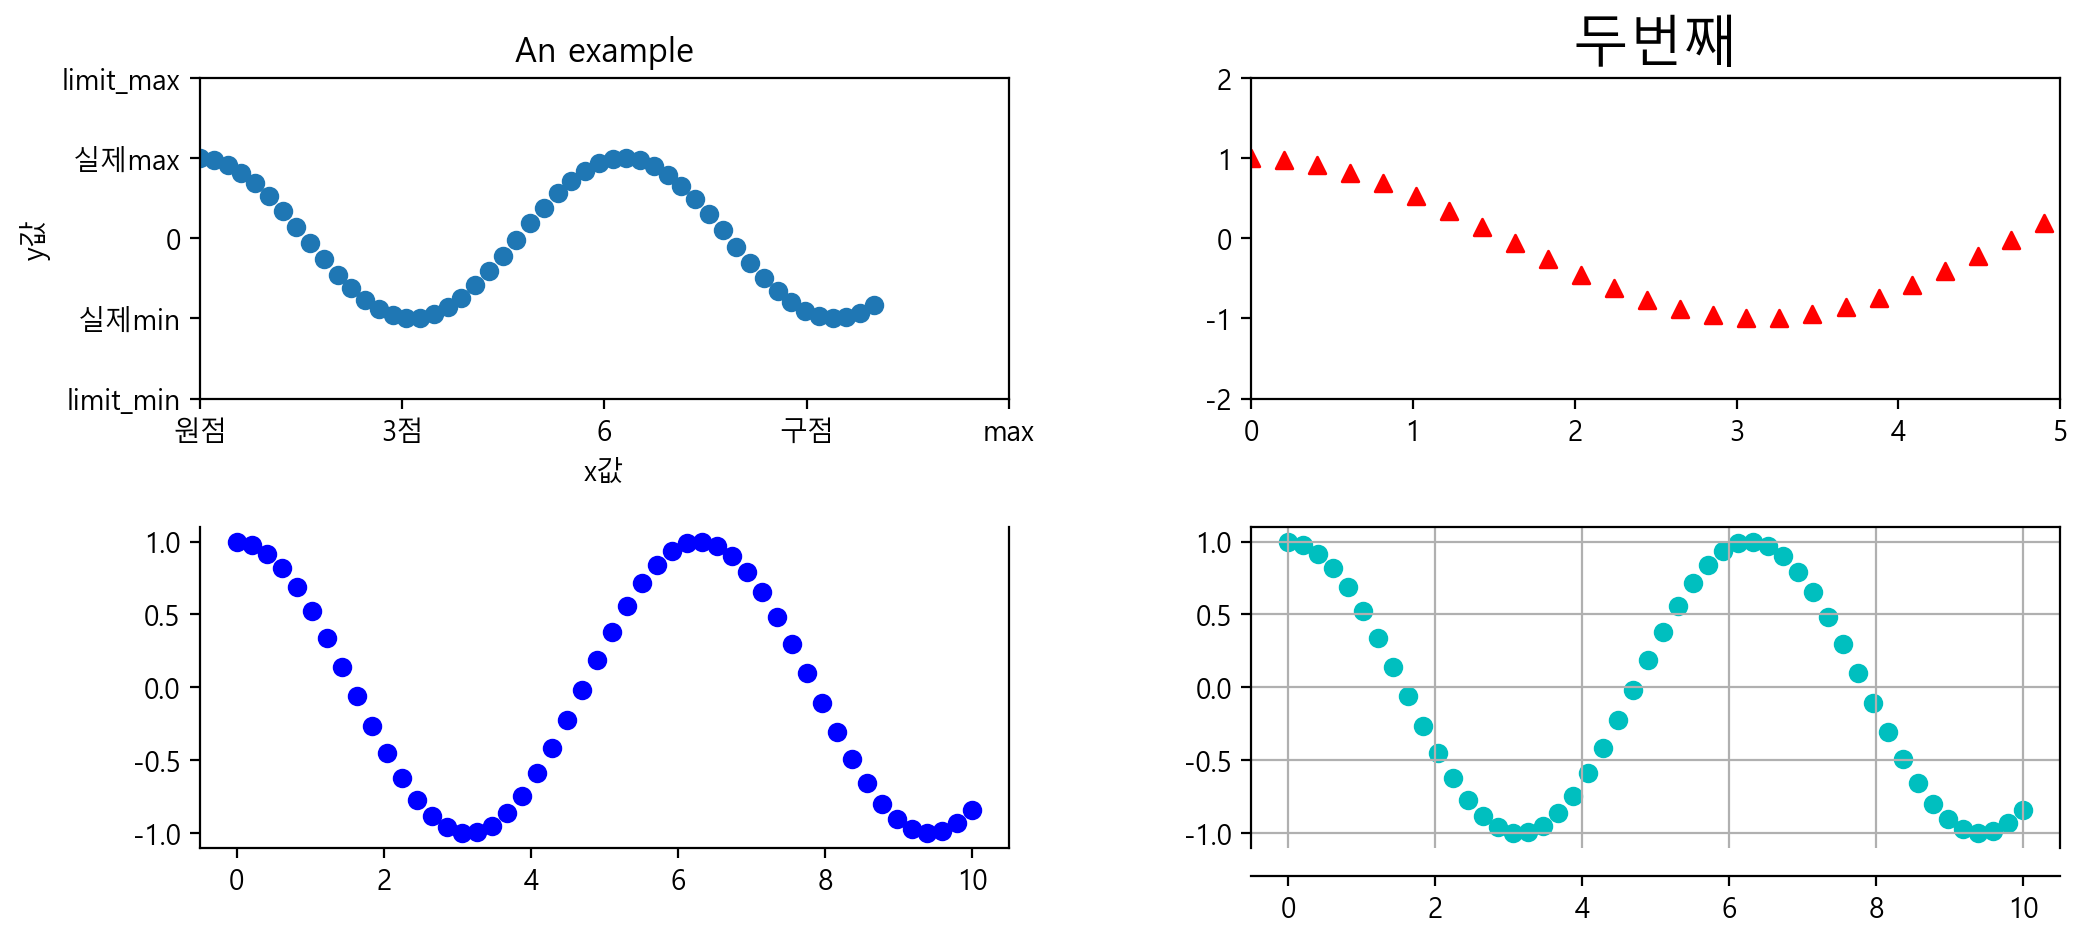

In [103]:
x = np.linspace(0, 10) # 0, 10까지 50개 값을 배열로 생성
y = np.cos(x)
fig, axes = plt.subplots(2, 2, figsize=(12,5))
# 서브플롯끼리 여백 조정(hspace 위아래 여백, wspace 좌우 여백)
plt.subplots_adjust(hspace=0.4, wspace=0.3)
axes[0,0].scatter(x, y)
axes[0,0].set(title='An example', ylabel='y값', xlabel='x값',
             xlim=[0, 12], # x축 눈금의 범위
             ylim=[-2, 2], # y축 눈금의 범위
             xticks=[0, 3, 6, 9, 12], # x축 눈금
             xticklabels = ['원점', '3점', 6, '구점', 'max'], #x축 눈금 라벨
             yticks = [-2, -1, 0, 1, 2], # y축 눈금
             yticklabels = ['limit_min', '실제min', 0, '실제max', 'limit_max'])
axes[0,1].scatter(x, y, c='r', marker='^')
axes[0,1].set_title('두번째', fontsize=20)
axes[0,1].set_xlim(0,5) #set(xlim=[0,5])
axes[0,1].set_ylim(-2, 2)
axes[1,0].scatter(x, y, c='b')
axes[1,0].spines['top'].set_visible(False)
axes[1,1].scatter(x, y, c='c')
axes[1,1].spines['bottom'].set_position( ('outward', 10) )
axes[1,1].grid(True)

### 5) 축공유

In [107]:
x = np.arange(0, 10)
y1 = 0.5 * x**2
y2 = -1 * y1



<function matplotlib.pyplot.show(close=None, block=None)>

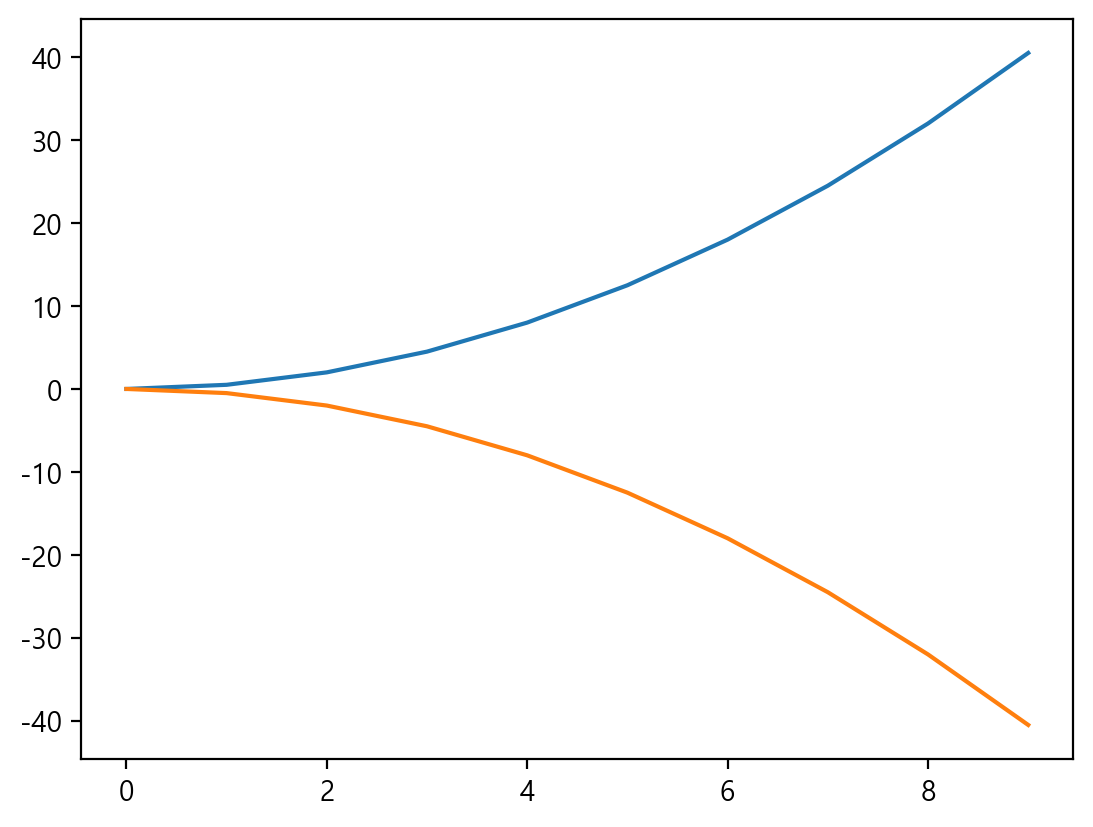

In [106]:
plt.plot(x, y1)
plt.plot(x, y2)
plt.show


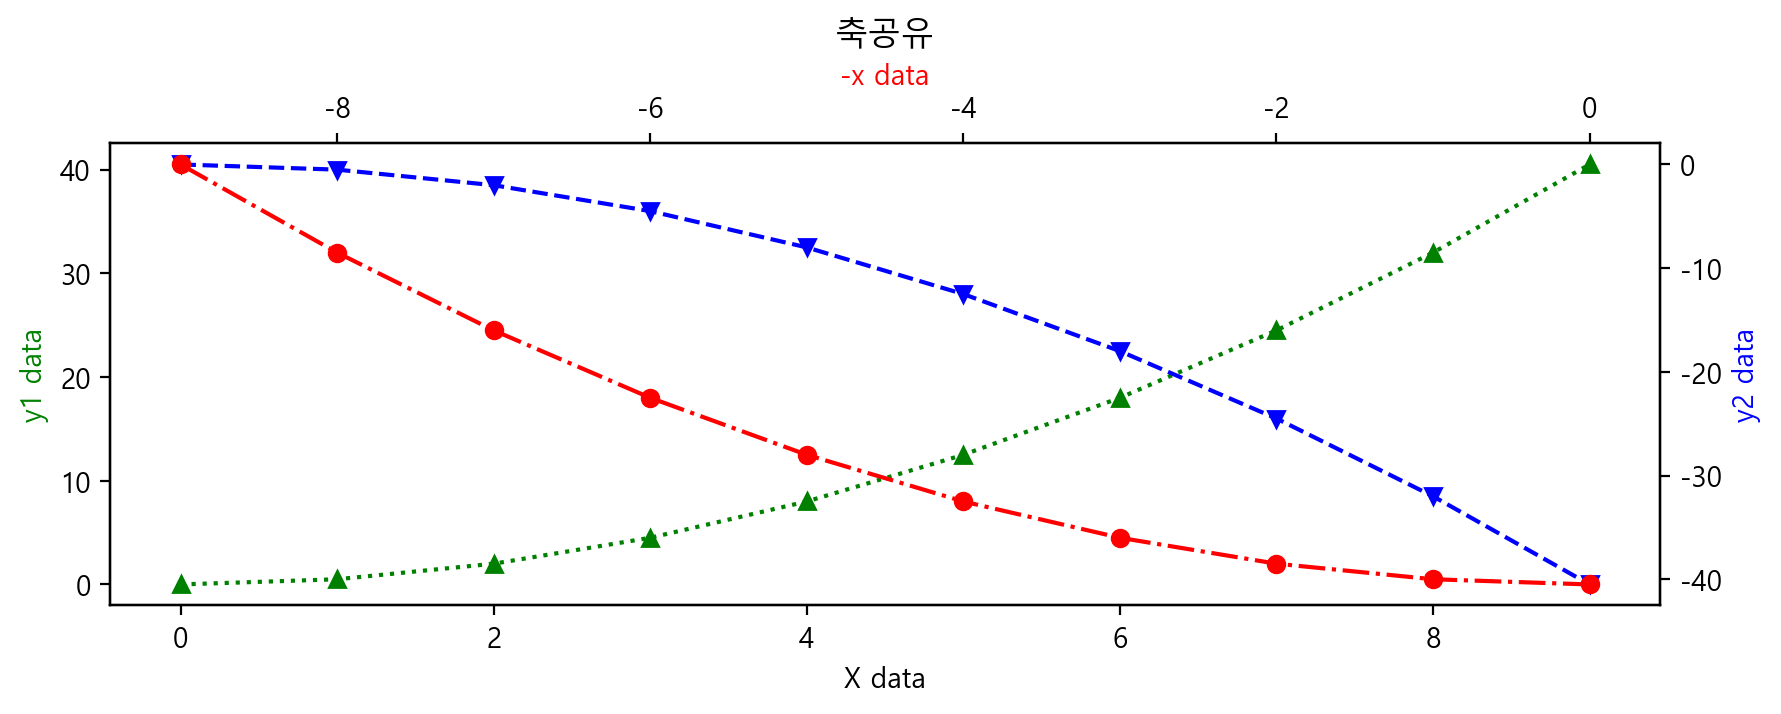

In [123]:
fig, ax1 = plt.subplots(figsize=(10,3))
ax1.plot(x, y1, 'g^:')
ax1.set(title='축공유', xlabel='X data')
ax1.set_ylabel('y1 data', color='g')

ax2 = ax1.twinx() # ax1과 x축을 공유하는 새로운 ax2가 만들어짐

ax2.plot(x, y2, 'bv--')
ax2.set_ylabel('y2 data', color='b')

ax3 = ax1.twiny() # ax1과 y축을 공유하는 ax3 생성
ax3.plot(-x, y1, 'ro-.')
ax3.set_xlabel('-x data', color='r')
plt.show()

### 6) 범례표시
범례사용 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

### 7) 플롯 스타일 지정

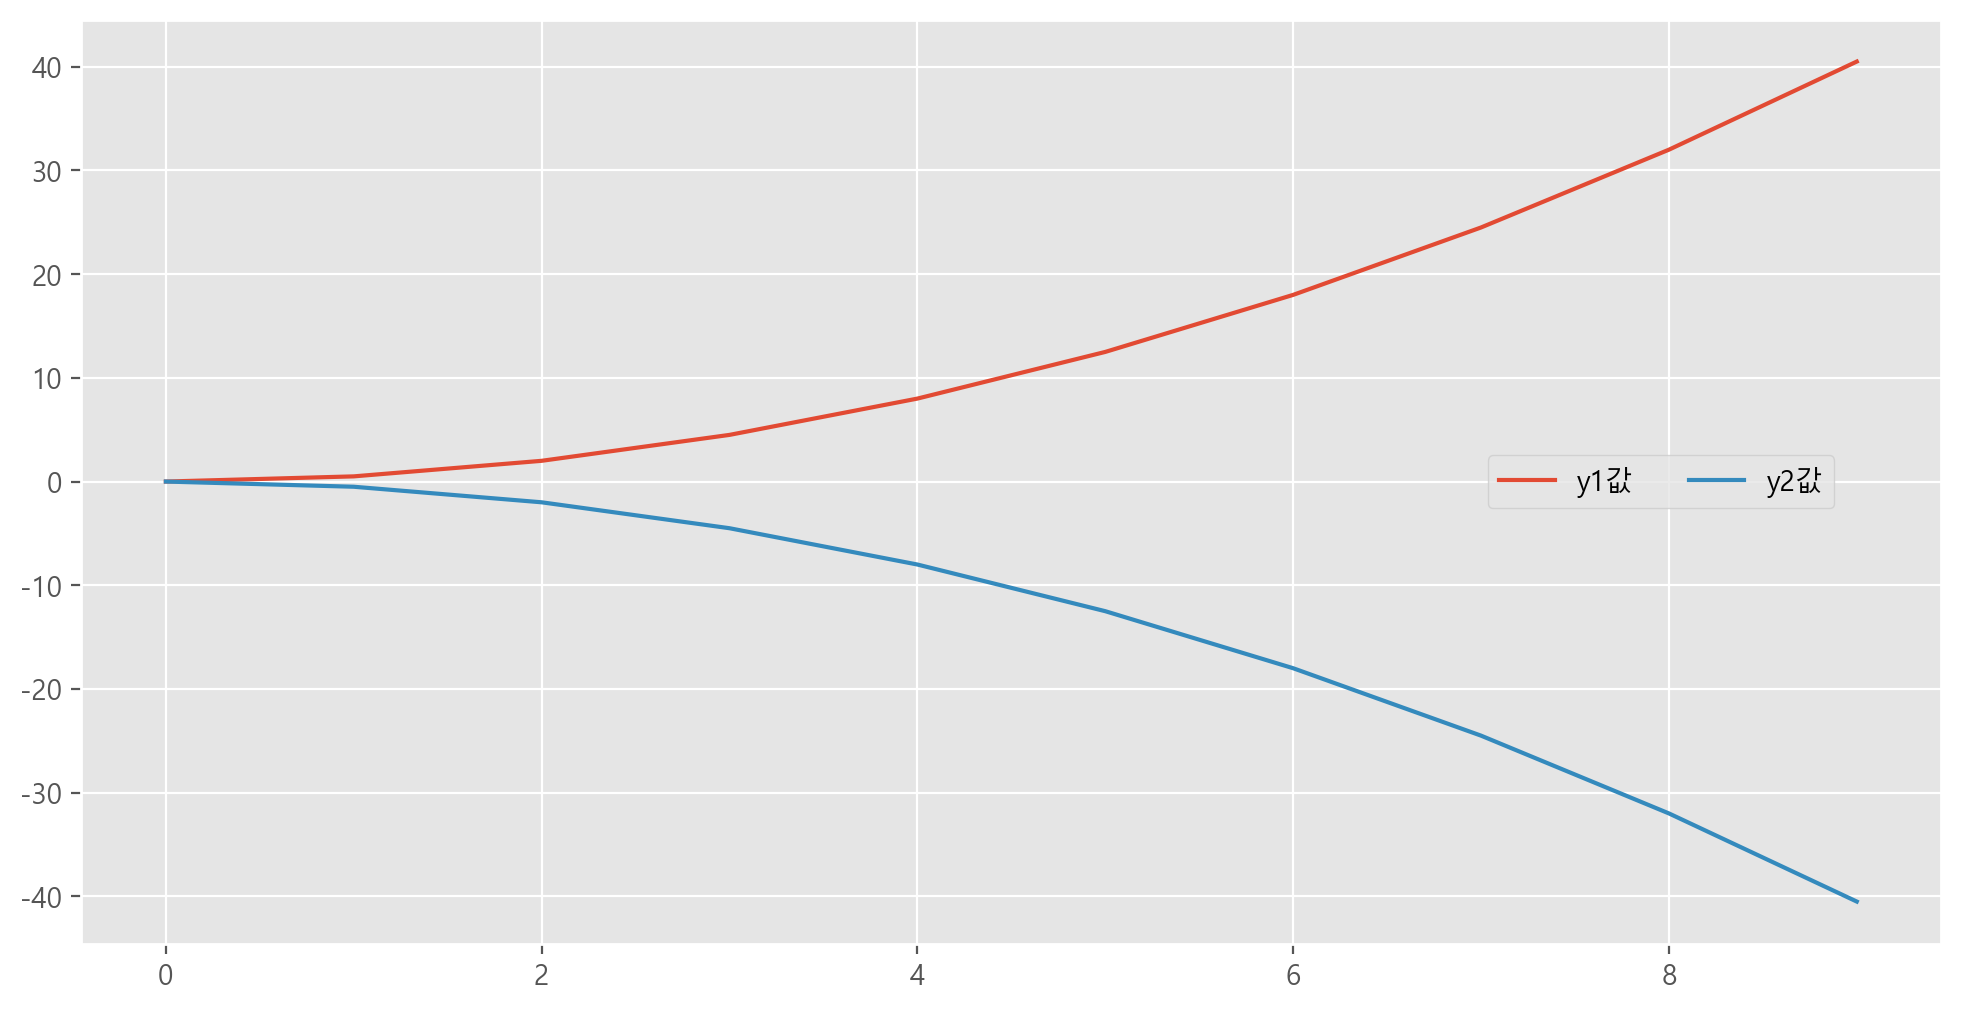

In [137]:
plt.style.use('ggplot') # 스타일 지정하는 함수를 쓰면 모든 설정 초기화
plt.figure(figsize=(12,6))
plt.plot(x, y1, label='y1값')
plt.plot(x, y2, label='y2값')
plt.legend(loc='center right', ncol=2, bbox_to_anchor=(0.95, 0.5))
plt.show()